In [227]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from cmath import *
%matplotlib notebook

last_figure = (None, None)

def plot(p, x_min=0, x_max=1, use_last_figure=False):
    global last_figure
    if use_last_figure:
        (fig, ax) = last_figure
    else:
        fig = plt.figure()
        ax = plt.axes()
    last_figure = (fig, ax)

    ax.set_aspect(1.0)
    ax.grid(color='b', alpha=0.1)
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')

#     ax.spines['left'].set_position('center')
#     ax.spines['bottom'].set_position('center')

#     # Eliminate upper and right axes
#     ax.spines['right'].set_color('none')
#     ax.spines['top'].set_color('none')

#     # Show ticks in the left and lower axes only
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
#     ax.set_xticks([x_min, x_max])
#     ax.set_yticks([0, 1])
    
    xs = np.linspace(x_min, x_max, int(abs(x_min - x_max)) * 10)
    ys = np.vectorize(p)(xs)
    plt.plot(xs, ys)
    fig.show()


# n=0 polynomial

<IPython.core.display.Javascript object>


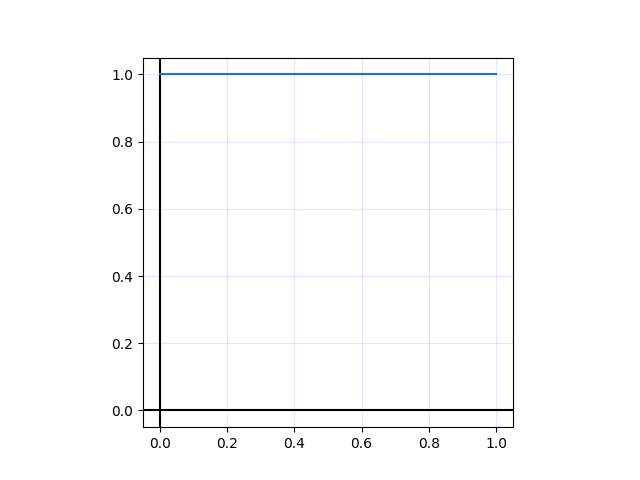

In [228]:
def P(x):
    return 1.0

plot(P)

# n=1 polynomial

<IPython.core.display.Javascript object>


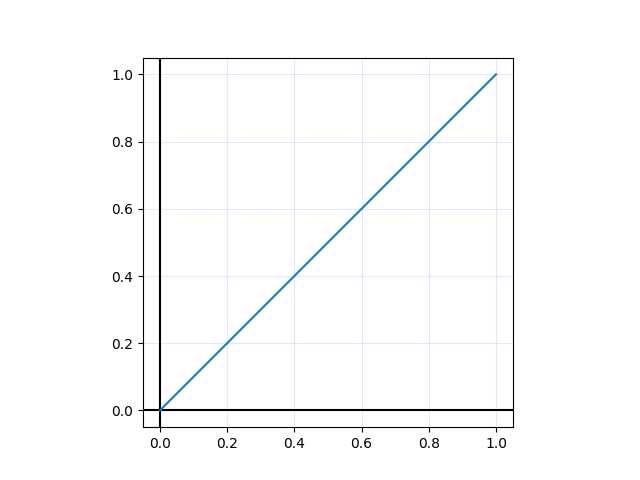

In [229]:
def P(x, an):
    return an[0] * x + an[1]

plot(lambda x: P(x, [1, 0]))

# n=2 polynomial

<IPython.core.display.Javascript object>


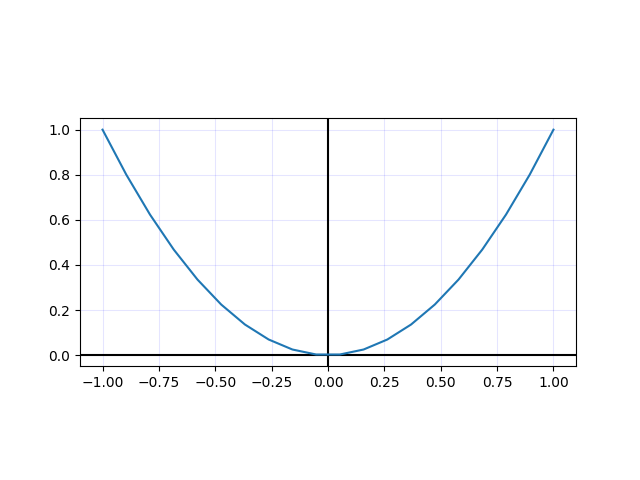

In [230]:
def P(x):
    a = 1
    b = 0
    c = 0
    return a * (x**2) + b * x + c

plot(P, -1, 1)

## quadratic with vertex
`def quadratic` is called the "standard form of qudratic". `x0` and `y0` are coordinates of parabolla vertex. The porabolla vertex is porabolla's extremum.

<IPython.core.display.Javascript object>


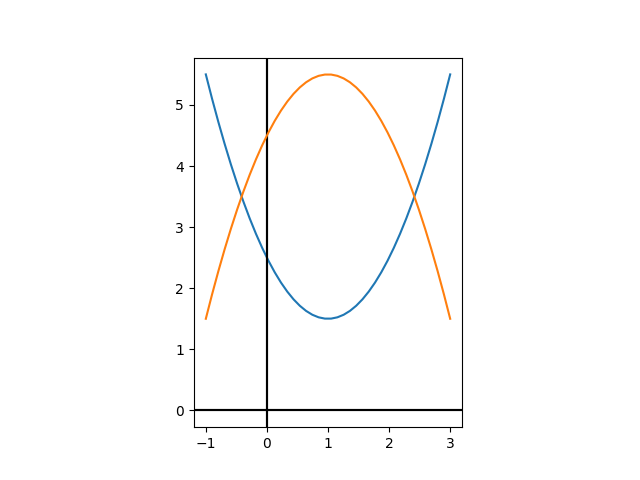

In [231]:
def quadratic(a, x0, y0):
    return (lambda x: a * ((x - x0)**2) + y0)
plot(quadratic(1, 1, 1.5), -1, 3)
plot(quadratic(-1, 1, 5.5), -1, 3, use_last_figure=True)

In [260]:
def y_intercepts(P):
    return P(0)

def quadratic(a, b, c):
    return (lambda x: a * (x**2) + b * x + c)

def x0_quadratic(a, b, c):
    bt = b / a
    return -bt / 2

def y0_quadratic(a, b, c):
    x0 = x0_quadratic(a, b, c)
    return quadratic(a, b, c)(x0)

def solve_quadratic(a, b, c):
    bt = b / a
    ct = c / a
    m = bt / 2
    d = sqrt(bt**2 / 4 - ct)
    return (-(m + d), -(m - d))

def x_intercepts(a, b, c):
    return solve_quadratic(a, b, c)

def quadratic_characteristic(
    a, b, c, should_plot=False, let_t=(lambda x: x)
):
    q = quadratic(a, b, c)
    x0 = x0_quadratic(a, b, c)
    y0 = y0_quadratic(a, b, c)
    (x1, x2) = solve_quadratic(a, b, c)
    (y1) = y_intercepts(q)
    minimum = (let_t(x0), q(let_t(x0))) if a > 0 else "-inf"
    maximum = (let_t(x0), q(let_t(x0))) if a < 0 else "inf"
    print("""
    {}x^2 + {}x + {}
    {}(x - {})^2 + {}
    (x - {})(x - {})
    
    y_interspects: {}
    minimum: {}
    maximum: {}
    """.format(a, b, c, a, x0, y0, x1, x2, y0, minimum, maximum))
    if should_plot:
        plot(q, x1.real - 2, x2.real + 2)



    -1x^2 + 1x + 2
    -1(x - 0.5)^2 + 2.25
    (x - (-1-0j))(x - (2-0j))
    
    y_interspects: 2.25
    minimum: -inf
    maximum: (0.5, 2.25)
    


<IPython.core.display.Javascript object>


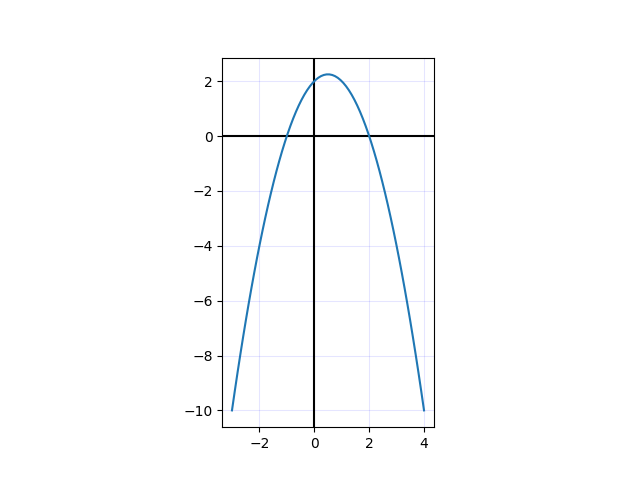

In [261]:
quadratic_characteristic(-1, 1, 2, True)

In [262]:
def quadratic_from_vertex(x0, y0, x1, y1):
    a = (y1 - y0) / ((x1 - x0)**2)**2
    t = (lambda x: a * (x - x0)**2 + y0)
    return t

def quadratic_coefs(P):
    c = P(0)
    b = ((P(2) - c) - 4 * (P(1) - c)) / -2
    a = P(1) - b - c
    return (a, b, c)

def quadratic_characteristic_f(f, should_plot=False):
    return quadratic_characteristic(*quadratic_coefs(f), should_plot)

quadratic_characteristic_f(quadratic_from_vertex(2, -3, 3, 1))


    4.0x^2 + -16.0x + 13.0
    4.0(x - 2.0)^2 + -3.0
    (x - (1.1339745962155614-0j))(x - (2.8660254037844384-0j))
    
    y_interspects: -3.0
    minimum: (2.0, -3.0)
    maximum: inf
    


In [266]:
quadratic_characteristic(-1, 4, 3, let_t=(lambda x: sqrt(x)))


    -1x^2 + 4x + 3
    -1(x - 2.0)^2 + 7.0
    (x - (-0.6457513110645907-0j))(x - (4.645751311064591-0j))
    
    y_interspects: 7.0
    minimum: -inf
    maximum: ((1.4142135623730951+0j), (6.65685424949238+0j))
    


In [272]:
quadratic_characteristic(4, 16, 2, let_t=(lambda x: -abs(x)**(1/3)))


    4x^2 + 16x + 2
    4(x - -2.0)^2 + -14.0
    (x - (-3.8708286933869704-0j))(x - (-0.12917130661302934-0j))
    
    y_interspects: -14.0
    minimum: (-1.2599210498948732, -11.809132590445174)
    maximum: inf
    
